# Análisis del dataset de AIRBNB 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from matplotlib.pyplot import show 
import seaborn as sns 

In [2]:
df1 = pd.read_excel("NYC.xlsx",sheet_name = "NYC1")
df2 = pd.read_excel("NYC.xlsx",sheet_name = "NYC2")

In [5]:
df = pd.merge(df1,df2,right_on="id", left_on="id")
df.head(5)

,id,name,host_id,host_name,municipio,barrio,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


1.	Graficar por municipio el número de habitaciones de cada tipo

In [6]:
df[df["municipio"]=="Bronx"]["room_type"].value_counts()

Private room       652
Entire home/apt    379
Shared room         60
Name: room_type, dtype: int64

<BarContainer object of 3 artists>

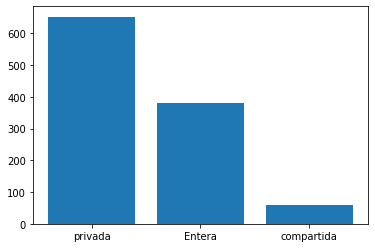

In [10]:
plt.bar(["privada","Entera","compartida"], [652,379,60])

<BarContainer object of 3 artists>

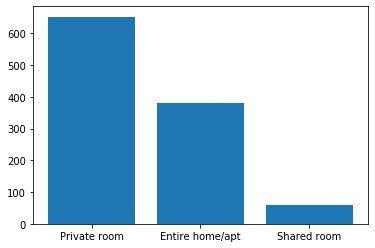

In [11]:
plt.bar(df[df["municipio"]=="Bronx"]["room_type"].value_counts().index , df[df["municipio"]=="Bronx"]["room_type"].value_counts().values)

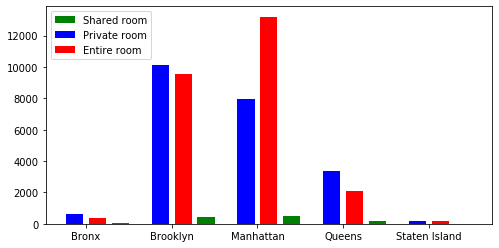

In [4]:
fig, ax = plt.subplots(figsize=(8,4))
etiquetas=list(df["municipio"].value_counts().sort_index().index)

valores=df[df["room_type"]=="Private room"]["municipio"].value_counts().sort_index().values
valores1=df[df["room_type"]=="Entire home/apt"]["municipio"].value_counts().sort_index().values
valores2=df[df["room_type"]=="Shared room"]["municipio"].value_counts().sort_index().values


x = np.arange(len(etiquetas))  # the label locations
width=0.4
plt.bar(x + width/1,valores2,0.2 ,color="green", label = "Shared room")
plt.bar(x - width/3,valores,0.2, color="blue", label = "Private room")
plt.bar(x + width/3,valores1,0.2 ,color="red", label = "Entire room")
plt.legend(loc=2)  
ax.set_xticks(x)
ax.set_xticklabels(etiquetas)
plt.show()

2.	Graficar por municipio el número de reviews

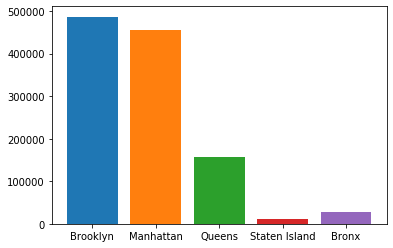

In [5]:
puntuaje_ciudad={"Brooklyn":0,"Manhattan":0,"Queens":0,"Staten Island":0,"Bronx":0}
for i in df.municipio.unique():
    puntuaje_ciudad[i]=(df[df["municipio"]==i]["number_of_reviews"].sum())
    
plt.bar(0,puntuaje_ciudad["Brooklyn"],tick_label=df.municipio.unique()[0])
plt.bar(1,puntuaje_ciudad["Manhattan"],tick_label=df.municipio.unique()[1]) 
plt.bar(2,puntuaje_ciudad["Queens"],tick_label=df.municipio.unique()[2]) 
plt.bar(3,puntuaje_ciudad["Staten Island"],tick_label=df.municipio.unique()[3])
plt.bar(4,puntuaje_ciudad["Bronx"],tick_label=df.municipio.unique()[4]) 
plt.xticks(range(0,5),df.municipio.unique()) 
plt.show() 

In [14]:
df.groupby('municipio')['number_of_reviews'].sum().sort_values(ascending=False).index

Index(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'], dtype='object', name='municipio')

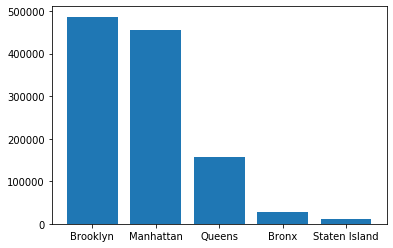

In [16]:
plt.bar(df.groupby('municipio')['number_of_reviews'].sum().sort_values(ascending=False).index, df.groupby('municipio')['number_of_reviews'].sum().sort_values(ascending=False).values)
plt.show()

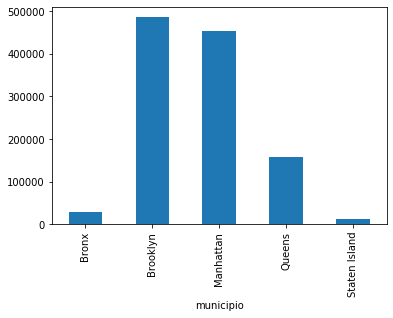

In [17]:
df5=df.groupby(["municipio"])["number_of_reviews"].sum()
df5
df5.plot.bar()
plt.show()

3.	Graficar el número de habitaciones individuales, casa/ dep completo y compartido de cada municipio.

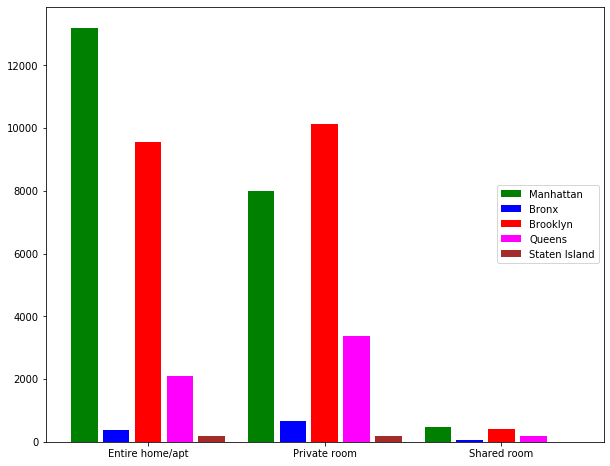

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
etiquetas=list(df["room_type"].value_counts().sort_index().index)

valores=df[df["municipio"]=="Manhattan"]["room_type"].value_counts().sort_index().values
valores1=df[df["municipio"]=="Bronx"]["room_type"].value_counts().sort_index().values
valores2=df[df["municipio"]=="Brooklyn"]["room_type"].value_counts().sort_index().values
valores3=df[df["municipio"]=="Queens"]["room_type"].value_counts().sort_index().values
valores4=df[df["municipio"]=="Staten Island"]["room_type"].value_counts().sort_index().values


x = np.arange(len(etiquetas))  # the label locations
width=0.6
plt.bar(x - 0.6*width,  valores,0.15 ,color="green", label = "Manhattan")
plt.bar(x - 0.3*width,  valores1,0.15, color="blue", label = "Bronx")
plt.bar(x,      valores2,0.15 ,color="red", label = "Brooklyn")
plt.bar(x +0.3*width,             valores3,0.15 ,color="magenta", label = "Queens")
plt.bar(x + 0.6*width,      valores4,0.15 ,color="brown", label = "Staten Island")

plt.legend(loc=7)  
ax.set_xticks(x)
ax.set_xticklabels(etiquetas)
plt.show()

4.	Graficar la cantidad de reviews de cada municipio de acuerdo a tipo de habitación

In [11]:
df2=df.groupby(["room_type","municipio"])["number_of_reviews"].sum()
df2

room_type        municipio    
Entire home/apt  Bronx             11627.0
                 Brooklyn         267128.0
                 Manhattan        235147.0
                 Queens            60644.0
                 Staten Island      5857.0
Private room     Bronx             16312.0
                 Brooklyn         213653.0
                 Manhattan        209150.0
                 Queens            93561.0
                 Staten Island      5670.0
Shared room      Bronx               432.0
                 Brooklyn           5793.0
                 Manhattan         10272.0
                 Queens             2745.0
                 Staten Island        14.0
Name: number_of_reviews, dtype: float64

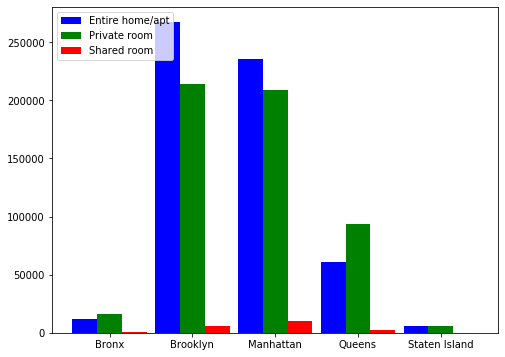

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
etiquetas=list(df["municipio"].value_counts().sort_index().index)

valores=df2["Entire home/apt"].values
valores1=df2["Private room"].values
valores2=df2["Shared room"].values


x = np.arange(len(etiquetas))  # the label locations
width=0.6
plt.bar(x - width/2, valores,0.3, color="blue", label = "Entire home/apt")
plt.bar(x , valores1, 0.3 ,color="green", label = "Private room")
plt.bar(x + width/2, valores2,0.3 ,color="red", label = "Shared room")
plt.legend(loc=2)  
ax.set_xticks(x)
ax.set_xticklabels(etiquetas)
plt.show()

5.	Graficar en un diagrama de caja el precio por habitación de cada municipio

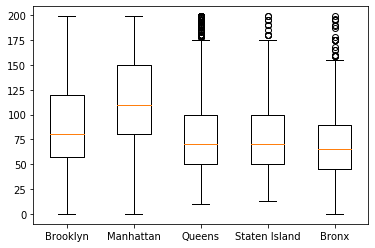

In [21]:
fig, ax = plt.subplots()
df.municipio.unique()[0]
ax.boxplot([df[(df["municipio"]==df.municipio.unique()[0]) &(df["price"]<200)]["price"],
           df[(df["municipio"]==df.municipio.unique()[1]) &(df["price"]<200)]["price"],
           df[(df["municipio"]==df.municipio.unique()[2]) &(df["price"]<200)]["price"],
           df[(df["municipio"]==df.municipio.unique()[3]) &(df["price"]<200)]["price"],
           df[(df["municipio"]==df.municipio.unique()[4]) &(df["price"]<200)]["price"]],
           labels=[df.municipio.unique()[0],df.municipio.unique()[1],
                   df.municipio.unique()[2],df.municipio.unique()[3],
                   df.municipio.unique()[4]])
plt.show()

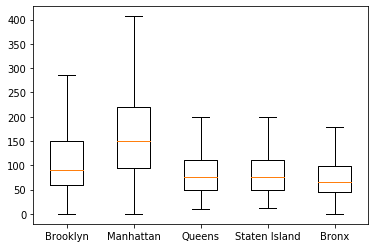

In [23]:
fig, ax = plt.subplots()
df.municipio.unique()[0]
ax.boxplot([df[(df["municipio"]==df.municipio.unique()[0])]["price"],
           df[(df["municipio"]==df.municipio.unique()[1]) ]["price"],
           df[(df["municipio"]==df.municipio.unique()[2])]["price"],
           df[(df["municipio"]==df.municipio.unique()[3]) ]["price"],
           df[(df["municipio"]==df.municipio.unique()[4])]["price"]],
           labels=[df.municipio.unique()[0],df.municipio.unique()[1],
                   df.municipio.unique()[2],df.municipio.unique()[3],
                   df.municipio.unique()[4]],showfliers=False)
plt.show()

6.	Graficar el precio en el eje “y” y en el eje “x” los 10 barrios con el mayor precio por habitación individual.

In [10]:
private = df[(df["room_type"]== "Private room")]
filt_exp = private.groupby("barrio")[["price"]].max().sort_values(by="price", ascending=False).iloc[0:10]
filt_exp

,price
barrio,
Astoria,10000.0
Lower East Side,9999.0
East Flatbush,7500.0
Upper West Side,6500.0
Bedford-Stuyvesant,5000.0
Chelsea,3210.0
Financial District,3000.0
Brighton Beach,3000.0
West Village,2850.0


In [24]:
barrios_top = list(df[df["room_type"]=="Private room"].sort_values("price", ascending=False).barrio.unique())[0:10]
barrios_top

['Astoria',
 'Lower East Side',
 'East Flatbush',
 'Upper West Side',
 'Bedford-Stuyvesant',
 'Chelsea',
 'Financial District',
 'Brighton Beach',
 'West Village',
 'East Village']

In [25]:
precio_top = []
for i in barrios_top:
    x1 = list(df[(df["barrio"]==i)&(df["room_type"]=="Private room")].sort_values("price", ascending=False)["price"])[0]
    precio_top.append(x1)
precio_top

[10000.0,
 9999.0,
 7500.0,
 6500.0,
 5000.0,
 3210.0,
 3000.0,
 3000.0,
 2850.0,
 2500.0]

<BarContainer object of 10 artists>

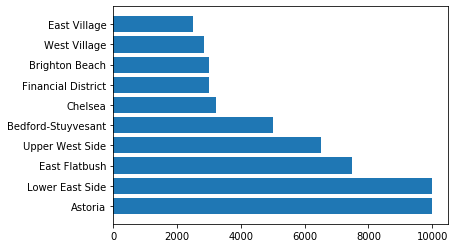

In [26]:
plt.barh(barrios_top,precio_top)

7.	Graficar el precio en el eje “y” y en el eje “x” los 10 barrios con el menor precio por dep/casa completo.


In [16]:
barrios_no_top = list(df[df["room_type"]=="Entire home/apt"].sort_values("price", ascending=True).barrio.unique())[0:10]
barrios_no_top

['Murray Hill',
 'Williamsburg',
 'Jamaica',
 'Greenpoint',
 'Sunset Park',
 'East Village',
 'Upper East Side',
 'Bedford-Stuyvesant',
 'Upper West Side',
 'Bushwick']

In [17]:
precio_top2 = []
for i in barrios_no_top:
    x1 = list(df[(df["barrio"]==i)&(df["room_type"]=="Entire home/apt")].sort_values("price", ascending=False)["price"])[0]
    precio_top2.append(x1)
precio_top2

[2000.0,
 4500.0,
 1000.0,
 10000.0,
 800.0,
 3750.0,
 7703.0,
 5000.0,
 10000.0,
 1000.0]

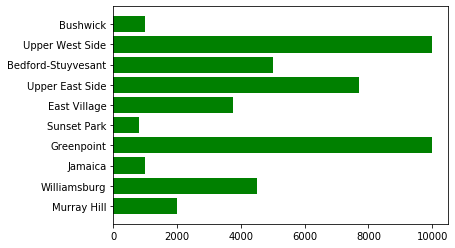

In [18]:
plt.barh(barrios_no_top,precio_top2, color="green")
plt.show()

8.	Graficar por municipio el top 5 de Airbnb con mayor rating 

In [19]:
puntuaje_ciudad={"Manhattan":10/10,"Brooklyn":8/10,"Queens":6/10,"Staten Island":4/10,"Bronx":2/10}
list_rating=[]
for i in df.index:
    ciudad = df.loc[i]["municipio"]
    num_reviews = df.loc[i]["number_of_reviews"]
    disponibilidad = df.loc[i]["availability_365"]
    rating =  puntuaje_ciudad[ciudad]+ num_reviews/629 + disponibilidad/365
    list_rating.append(rating)
df["rating"] = list_rating
df.head()

,id,name,host_id,host_name,municipio,barrio,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rating
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,1.814308
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,2.044145
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,NaN,1.0,365.0,2.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,1.760760
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,1.014308


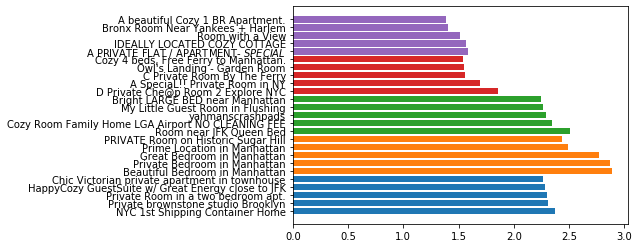

In [20]:
for i in df.municipio.unique():
    rating = list(df[df["municipio"]==i].sort_values("rating", ascending=False)["rating"])[0:5]
    Airbnb = list(df[df["municipio"]==i].sort_values("rating", ascending=False)["name"])[0:5]
    #grafica = sns.FacetGrid(data=df, col = "municipio")
    #plt.subplots(1)
    grafica = plt.barh(Airbnb, rating) 

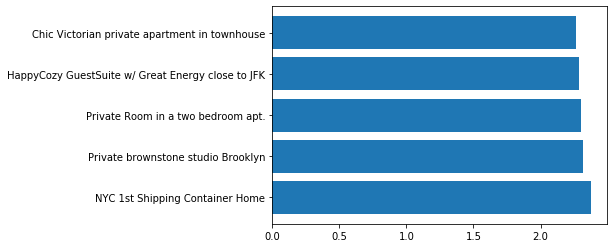

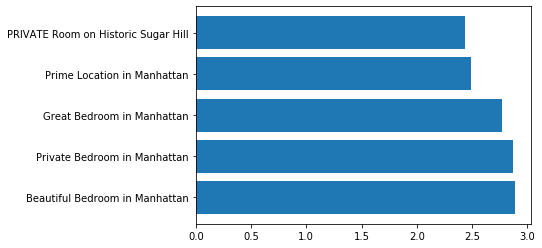

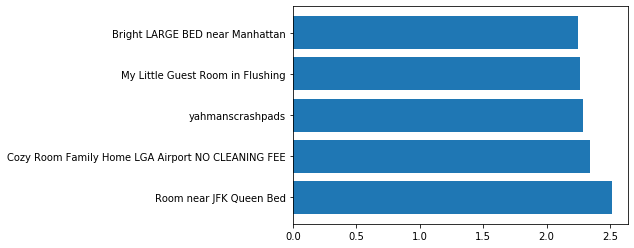

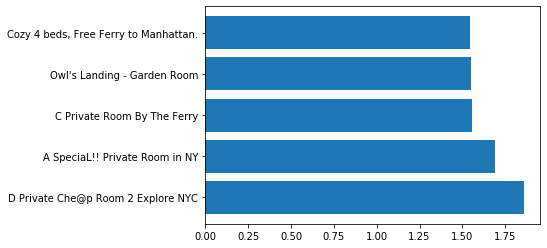

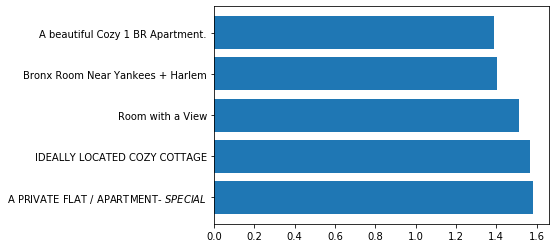

In [21]:
for i in df.municipio.unique():
    rating = list(df[df["municipio"]==i].sort_values("rating", ascending=False)["rating"])[0:5]
    Airbnb = list(df[df["municipio"]==i].sort_values("rating", ascending=False)["name"])[0:5]
    #grafica = sns.FacetGrid(data=df, col = "municipio")
    plt.subplots(1)
    grafica = plt.barh(Airbnb, rating) 

9.	En una gráfica scatter muestra precio vs rating de los primeros 50 Airbnb


Text(0.5, 1.0, 'scatter')

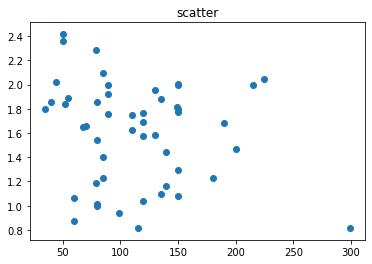

In [22]:
fig, axes = plt.subplots()
#data=df.sort_values("rating", ascending=False).iloc[0:50]
data=df.iloc[0:50]
axes.scatter(data["price"],data["rating"])
axes.set_title("scatter")

Text(0.5, 1.0, 'scatter')

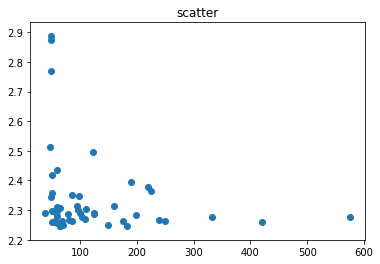

In [23]:
fig, axes = plt.subplots()
data=df.sort_values("rating", ascending=False).iloc[0:50]
axes.scatter(data["price"],data["rating"])
axes.set_title("scatter")

# SECCIÓN 4

1.	Mostrar en un mapa un marcador por Airbnb diferenciando por color cada municipio de los primeros 25 Airbnb con mayor precio

In [33]:
df[df["municipio"]=="Bronx"].sort_values("price",ascending=False).iloc[0:25].longitude

24477   -73.91510
48282   -73.78497
25422   -73.91411
8521    -73.90363
38433   -73.84469
25405   -73.91494
48310   -73.78433
16607   -73.86349
15111   -73.92149
34709   -73.83574
15409   -73.84638
25880   -73.84830
7018    -73.84681
18176   -73.86818
32056   -73.89756
48102   -73.90969
48496   -73.85093
30602   -73.91151
16994   -73.90266
37279   -73.86511
23519   -73.85312
10710   -73.80001
47661   -73.84779
44858   -73.84785
29269   -73.83697
Name: longitude, dtype: float64

In [34]:
NY_map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
# Inicializamos un feature group para los incidentes en el dataframe

Airbnb = folium.map.FeatureGroup()
colores = ["red","blue","yellow","green","pink"]
for x,i in enumerate(df.municipio.unique()):
    for lat, lng, in zip(df[df["municipio"]==i].sort_values("price",ascending=False).iloc[0:25].latitude, df[df["municipio"]==i].sort_values("price",ascending=False).iloc[0:25].longitude): #la columna Y y X son las coordenadas 
        Airbnb.add_child(
                folium.CircleMarker([lat, lng],
                radius=4, # difine el tamaño de los circulos
                color=colores[x],
                fill=True,
                fill_color=colores[x],
                fill_opacity=0.4
            )
        )
    NY_map.add_child(Airbnb)

NY_map

2.	Mostrar en un mapa los 100 Airbnb con mayor rating 

In [6]:
NY_map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
# Inicializamos un feature group para los incidentes en el dataframe

Airbnb = folium.map.FeatureGroup()
for i in df.municipio.unique():
    for lat, lng, in zip(df.sort_values("rating", ascending = False).iloc[0:100].latitude, df.sort_values("rating", ascending = False).iloc[0:100].longitude): #la columna Y y X son las coordenadas 
        Airbnb.add_child(
                folium.features.CircleMarker([lat, lng],
                radius=4, # difine el tamaño de los circulos
                color="yellow",
                fill=True,
                fill_color="blue",
                fill_opacity=0.4
            )
        )
    NY_map.add_child(Airbnb)

NY_map

KeyError: 'rating'

3.	Mostrar en un mapa los 3 Airbnb con mayor rating de cada barrio 

In [ ]:
dfnew = pd.DataFrame(columns=df.columns)
for i in df.barrio.unique():
    resultado = df.sort_values("rating", ascending=False)[df.sort_values("rating", ascending=False)["barrio"]==i].iloc[0:1]
    dfnew = pd.concat([dfnew, resultado], axis=0, sort=False)
dfnew.head(4)

In [ ]:
NY_map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
# Inicializamos un feature group para los incidentes en el dataframe

Airbnb = folium.map.FeatureGroup()
for i in df.municipio.unique():
    for lat, lng, in zip(dfnew.latitude, dfnew.longitude):
        Airbnb.add_child(
                folium.features.CircleMarker([lat, lng],
                radius=4, # difine el tamaño de los circulos
                color="yellow",
                fill=True,
                fill_color="blue",
                fill_opacity=0.4
            )
        )
    NY_map.add_child(Airbnb)

NY_map

4.	Mostrar en un mapa los 25 Airbnb con mayor número de reviews  

In [35]:
NY_map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
# Inicializamos un feature group para los incidentes en el dataframe

Airbnb = folium.map.FeatureGroup()
for i in df.municipio.unique():
    for lat, lng, in zip(df.sort_values("number_of_reviews", ascending = False).iloc[0:25].latitude, df.sort_values("number_of_reviews", ascending = False).iloc[0:25].longitude):
        Airbnb.add_child(
                folium.CircleMarker([lat, lng],
                radius=4, # difine el tamaño de los circulos
                color="yellow",
                fill=True,
                fill_color="blue",
                fill_opacity=0.4
            )
        )
    NY_map.add_child(Airbnb)

NY_map

In [37]:
df.iloc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
municipio                                                   Brooklyn
barrio                                                    Kensington
latitude                                                     40.6475
longitude                                                   -73.9724
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                      2018-10-19 00:00:00
reviews_per_month                                               0.21
calculated_host_listings_count    

In [39]:
df.loc["a"]

KeyError: 'a'